In [2]:
!pip install split_folders

In [20]:
import splitfolders

In [21]:
input_folder="Books_Dataset/input_dataset"
output="Books_Dataset/processed_dataset"
splitfolders.ratio(input_folder,output,seed=42,ratio=(.6,.2,.2))

Copying files: 3941 files [01:09, 56.69 files/s]


In [38]:
help(splitfolders.ratio)

Help on function ratio in module splitfolders.split:

ratio(input, output='output', seed=1337, ratio=(0.8, 0.1, 0.1), group_prefix=None, move=False)



In [1]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np


In [2]:
img_height, img_width = (224, 224)
batch_size = 32

train_data_dir = r"Books_Dataset/processed_dataset\train"
valid_data_dir = r"Books_Dataset/processed_dataset\val"
test_data_dir = r"Books_Dataset/processed_dataset\test"

In [3]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest',
    validation_split=0.4
)

valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.4
)


In [4]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=42
)

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=42
)


Found 114 images belonging to 4 classes.
Found 23 images belonging to 4 classes.


In [5]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


Found 65 images belonging to 4 classes.


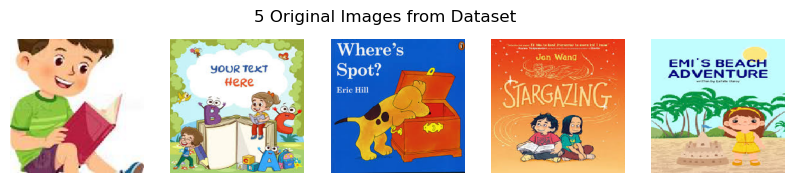

In [6]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define dataset path
train_data_dir = r"Books_Dataset/processed_dataset/train"  # Update path if needed

# Get list of class folders
class_folders = os.listdir(train_data_dir)

# Collect image paths
image_paths = []
for class_folder in class_folders:
    class_path = os.path.join(train_data_dir, class_folder)
    if os.path.isdir(class_path):  # Ensure it's a directory
        images = [os.path.join(class_path, img) for img in os.listdir(class_path)]
        image_paths.extend(images)

# Select first 5 images (or randomly select 5)
selected_images = image_paths[:5]  # Change this to random.sample(image_paths, 5) for random images

# Display images
plt.figure(figsize=(10, 2))
for i, img_path in enumerate(selected_images):
    img = load_img(img_path, target_size=(224, 224))  # Load image
    img_array = img_to_array(img).astype("uint8")  # Convert to correct format
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(img_array)
    plt.axis("off")
plt.suptitle("5 Original Images from Dataset")
plt.show()


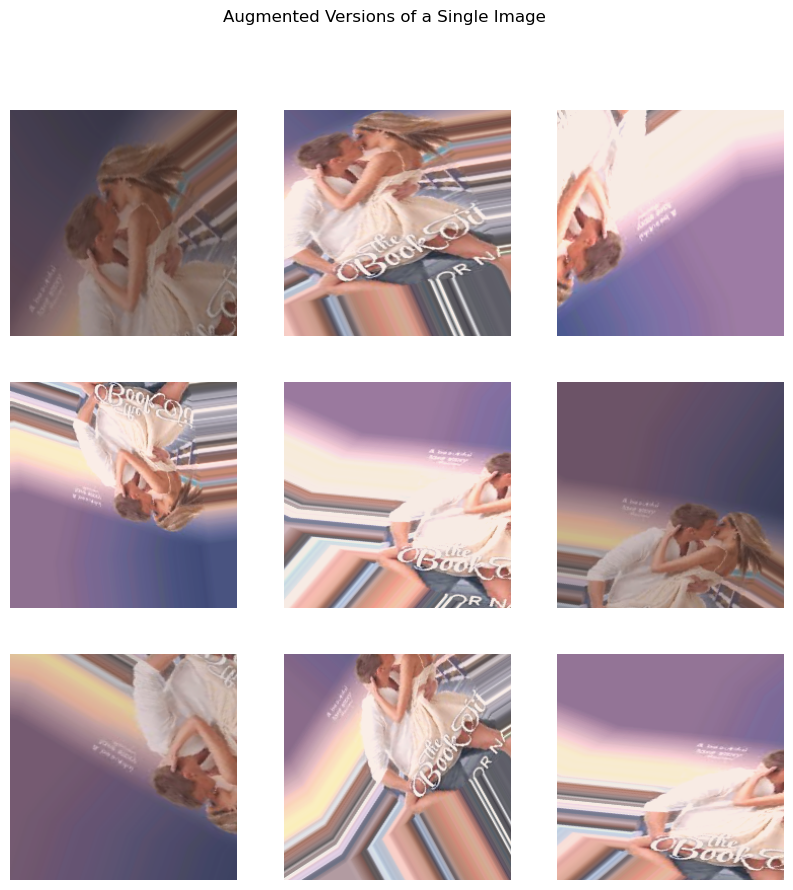

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a single image from train_generator
x_batch, y_batch = train_generator.next()  # Get batch
sample_image = x_batch[0]  # Take the first image

# Reshape to add batch dimension (Keras expects input as batch)
sample_image = np.expand_dims(sample_image, axis=0)  

# Create a data generator that applies augmentation ONLY to this image
augmented_images = train_datagen.flow(sample_image, batch_size=1)  

# Plot multiple augmented versions of the same image
plt.figure(figsize=(10, 10))
for i in range(9):  
    augmented_image = augmented_images.next()[0].astype("uint8")  # Get transformed image
    
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image)
    plt.axis("off")

plt.suptitle("Augmented Versions of a Single Image")
plt.show()


In [69]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=15)


Epoch 1/15
4/4 [==============================] - 20s 4s/step - loss: 6.7282 - accuracy: 0.2281
Epoch 2/15
4/4 [==============================] - 14s 3s/step - loss: 2.0017 - accuracy: 0.5088
Epoch 3/15
4/4 [==============================] - 15s 3s/step - loss: 1.4711 - accuracy: 0.6667
Epoch 4/15
4/4 [==============================] - 15s 3s/step - loss: 0.7159 - accuracy: 0.7719
Epoch 5/15
4/4 [==============================] - 15s 3s/step - loss: 0.6753 - accuracy: 0.7632
Epoch 6/15
4/4 [==============================] - 15s 3s/step - loss: 0.3964 - accuracy: 0.8596
Epoch 7/15
4/4 [==============================] - 16s 3s/step - loss: 0.3297 - accuracy: 0.8596
Epoch 8/15
4/4 [==============================] - 17s 4s/step - loss: 0.2469 - accuracy: 0.9035
Epoch 9/15
4/4 [==============================] - 16s 3s/step - loss: 0.2212 - accuracy: 0.9211
Epoch 10/15
4/4 [==============================] - 16s 3s/step - loss: 0.2235 - accuracy: 0.9211
Epoch 11/15
4/4 [======================

In [71]:
model.save('Saved_Model/ResNet50_books3.keras')


In [70]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)


65/65 - 15s - loss: 0.9470 - accuracy: 0.6923 - 15s/epoch - 225ms/step

Test accuracy: 0.692307710647583


1/1 [==============================] - 0s 222ms/step


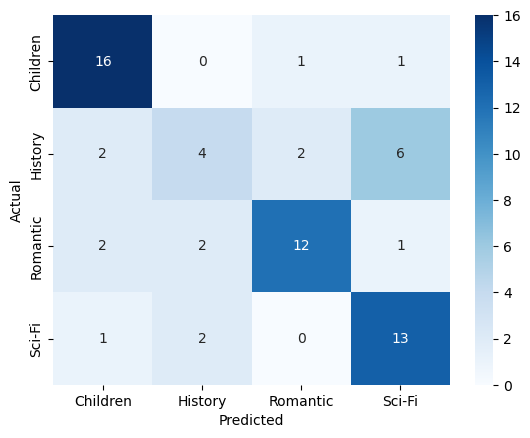

Test accuracy: 69.23%


In [73]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model("Saved_Model/ResNet50_books3.keras")

# Assuming test_generator and train_generator are already defined

filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob = [] 
y_act = []

test_generator.reset()

# Collect predictions and actual values
for __ in range(nb_samples):
    X_test, Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

# Convert list of predicted probabilities into predicted class indices
y_prob = np.vstack(y_prob)  # Combine all predictions into one array
y_act = np.vstack(y_act)    # Combine all true labels into one array

# Get predicted class for each sample
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]

# Get actual class for each sample
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

# Create a DataFrame for the results
out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class', 'actual_class'])

# Compute confusion matrix
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

# Plot confusion matrix
sn.heatmap(confusion_matrix, cmap='Blues', annot=True, fmt='d')
plt.show()

# Calculate and print the test accuracy
accuracy = np.diagonal(confusion_matrix).sum() / confusion_matrix.sum().sum() * 100
print('Test accuracy: {:.2f}%'.format(accuracy))


1/1 [==============================] - 1s 1s/step


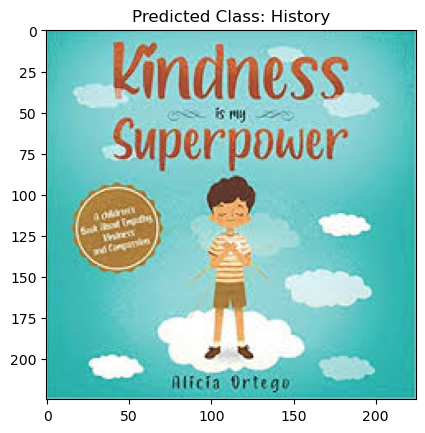

In [77]:
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the CNN model
model = models.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=15)


Epoch 1/15
4/4 [==============================] - 27s 4s/step - loss: 1196.3057 - accuracy: 0.2018
Epoch 2/15
4/4 [==============================] - 17s 4s/step - loss: 326.6164 - accuracy: 0.3158
Epoch 3/15
4/4 [==============================] - 18s 3s/step - loss: 61.3405 - accuracy: 0.3772
Epoch 4/15
4/4 [==============================] - 17s 4s/step - loss: 7.4660 - accuracy: 0.3158
Epoch 5/15
4/4 [==============================] - 15s 4s/step - loss: 2.9912 - accuracy: 0.2895
Epoch 6/15
4/4 [==============================] - 18s 4s/step - loss: 2.2720 - accuracy: 0.2719
Epoch 7/15
4/4 [==============================] - 17s 4s/step - loss: 1.6416 - accuracy: 0.3246
Epoch 8/15
4/4 [==============================] - 17s 4s/step - loss: 1.4422 - accuracy: 0.3772
Epoch 9/15
4/4 [==============================] - 17s 4s/step - loss: 1.3319 - accuracy: 0.2807
Epoch 10/15
4/4 [==============================] - 18s 3s/step - loss: 1.3678 - accuracy: 0.3246
Epoch 11/15
4/4 [================

In [78]:
model.save('Saved_Model/ResNet50_books3_cnn.keras')


In [79]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)


65/65 - 6s - loss: 1.3665 - accuracy: 0.3846 - 6s/epoch - 95ms/step

Test accuracy: 0.38461539149284363


1/1 [==============================] - 0s 122ms/step


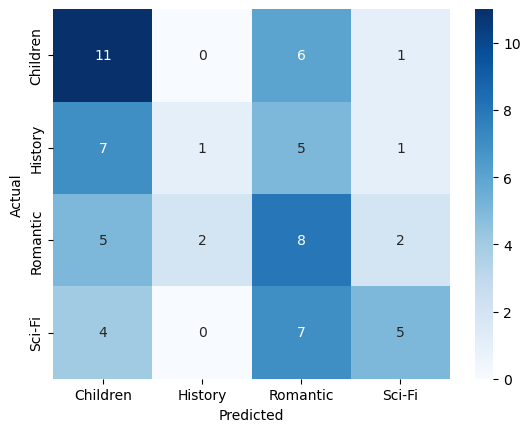

Test accuracy: 38.46%


In [80]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model("Saved_Model/ResNet50_books3_cnn.keras")

# Assuming test_generator and train_generator are already defined

filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob = [] 
y_act = []

test_generator.reset()

# Collect predictions and actual values
for __ in range(nb_samples):
    X_test, Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

# Convert list of predicted probabilities into predicted class indices
y_prob = np.vstack(y_prob)  # Combine all predictions into one array
y_act = np.vstack(y_act)    # Combine all true labels into one array

# Get predicted class for each sample
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]

# Get actual class for each sample
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

# Create a DataFrame for the results
out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class', 'actual_class'])

# Compute confusion matrix
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

# Plot confusion matrix
sn.heatmap(confusion_matrix, cmap='Blues', annot=True, fmt='d')
plt.show()

# Calculate and print the test accuracy
accuracy = np.diagonal(confusion_matrix).sum() / confusion_matrix.sum().sum() * 100
print('Test accuracy: {:.2f}%'.format(accuracy))


In [18]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Load the MobileNetV2 model without the top classification layer
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers to prevent them from training initially
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=50, validation_data=valid_generator)




Epoch 1/50
4/4 [==============================] - 11s 2s/step - loss: 1.9790 - accuracy: 0.3860 - val_loss: 2.4166 - val_accuracy: 0.3043
Epoch 2/50
4/4 [==============================] - 6s 1s/step - loss: 1.8034 - accuracy: 0.4298 - val_loss: 1.9352 - val_accuracy: 0.1739
Epoch 3/50
4/4 [==============================] - 6s 1s/step - loss: 1.1393 - accuracy: 0.5702 - val_loss: 1.7165 - val_accuracy: 0.3043
Epoch 4/50
4/4 [==============================] - 6s 2s/step - loss: 0.9631 - accuracy: 0.5789 - val_loss: 1.7935 - val_accuracy: 0.3043
Epoch 5/50
4/4 [==============================] - 6s 2s/step - loss: 0.9180 - accuracy: 0.6228 - val_loss: 1.8754 - val_accuracy: 0.2609
Epoch 6/50
4/4 [==============================] - 7s 2s/step - loss: 0.8547 - accuracy: 0.5877 - val_loss: 1.7629 - val_accuracy: 0.2174
Epoch 7/50
4/4 [==============================] - 7s 2s/step - loss: 0.8935 - accuracy: 0.5965 - val_loss: 1.7454 - val_accuracy: 0.1739
Epoch 8/50
4/4 [========================

In [9]:
# Save the trained model
model.save('Saved_Model/MobileNetV2_books.keras')


In [19]:

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

65/65 - 4s - loss: 1.4768 - accuracy: 0.5231 - 4s/epoch - 55ms/step

Test accuracy: 0.5230769515037537


1/1 [==============================] - 0s 66ms/step


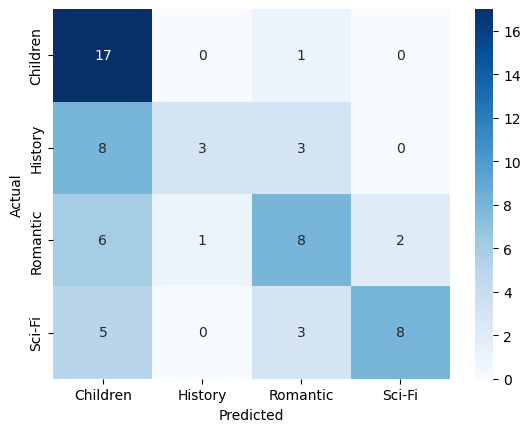

Test accuracy: 55.38%


In [11]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model("Saved_Model/MobileNetV2_books.keras")

# Assuming test_generator and train_generator are already defined

filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob = [] 
y_act = []

test_generator.reset()

# Collect predictions and actual values
for __ in range(nb_samples):
    X_test, Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

# Convert list of predicted probabilities into predicted class indices
y_prob = np.vstack(y_prob)  # Combine all predictions into one array
y_act = np.vstack(y_act)    # Combine all true labels into one array

# Get predicted class for each sample
predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]

# Get actual class for each sample
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

# Create a DataFrame for the results
out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class', 'actual_class'])

# Compute confusion matrix
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

# Plot confusion matrix
sn.heatmap(confusion_matrix, cmap='Blues', annot=True, fmt='d')
plt.show()

# Calculate and print the test accuracy
accuracy = np.diagonal(confusion_matrix).sum() / confusion_matrix.sum().sum() * 100
print('Test accuracy: {:.2f}%'.format(accuracy))


1/1 [==============================] - 1s 1s/step
Predicted class: Children


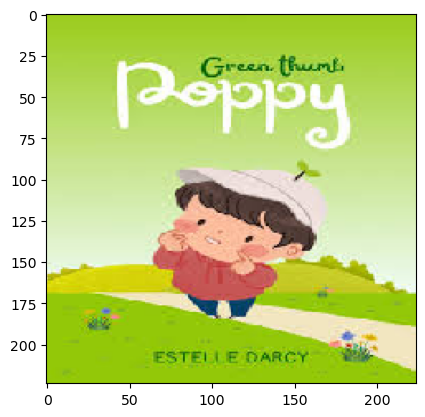

In [17]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

# Load the image with target size
img_path = '4.jpg'  # Replace with your image path
img = load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = img_to_array(img)

# Expand dimensions to match the model's input shape
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image
img_array = preprocess_input(img_array)
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('Saved_Model/MobileNetV2_books.keras')
# Predict the class probabilities
predictions = model.predict(img_array)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(predictions, axis=1)[0]
# Assuming you have the class_indices from your training generator
class_indices = train_generator.class_indices  # Replace with your actual class_indices
# Create a mapping from index to class label
labels = {v: k for k, v in class_indices.items()}

# Get the predicted class label
predicted_label = labels[predicted_class_index]

print(f'Predicted class: {predicted_label}')
plt.imshow(img)
